In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
test_df = pd.read_csv('drugsComTest_raw.tsv', sep = '\t')
train_df = pd.read_csv('drugsComTrain_raw.tsv', sep = '\t')

In [3]:
#Merging the two datasets 
frames = [test_df, train_df]
df = pd.concat(frames)


df.rename(columns={'Unnamed: 0':'uniqueid'}, inplace=True )
df.columns = df.columns.str.lower()

df.head(5)

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


# Data Description 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   uniqueid     215063 non-null  int64  
 1   drugname     215063 non-null  object 
 2   condition    213869 non-null  object 
 3   review       215063 non-null  object 
 4   rating       215063 non-null  float64
 5   date         215063 non-null  object 
 6   usefulcount  215063 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 13.1+ MB


In [5]:
df.dtypes

uniqueid         int64
drugname        object
condition       object
review          object
rating         float64
date            object
usefulcount      int64
dtype: object

In [6]:
df.shape

(215063, 7)

In [7]:
df.describe()

,uniqueid,rating,usefulcount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


# Removing NA Values

In [8]:
#Searching for NA values 
print("Missing Data Table")
df.isnull().sum()

Missing Data Table


uniqueid          0
drugname          0
condition      1194
review            0
rating            0
date              0
usefulcount       0
dtype: int64

In [9]:
size = df.shape[0]
condition_na = df['condition'].isnull().sum()

print(f'Percentage of NA values in conditions: {condition_na/size*100}%')

Percentage of NA values in conditions: 0.5551861547546533%


In [10]:
df = df.dropna()
print("Missing Value Table")
print(df.isnull().sum())
print()
print('New Data Shape:', df.shape)

Missing Value Table
uniqueid       0
drugname       0
condition      0
review         0
rating         0
date           0
usefulcount    0
dtype: int64

New Data Shape: (213869, 7)


# Sorting Dataset and Removing Duplicates

In [11]:
df.sort_values(['uniqueid'], ascending = True, inplace = True)
df.reset_index(drop = True, inplace = True)
df.head(5)

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3.0,"October 28, 2015",4
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10.0,"October 27, 2015",11
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8.0,"October 27, 2015",7
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9.0,"October 26, 2015",12
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1.0,"October 25, 2015",4


In [12]:
df.duplicated().sum()

0

# Examining Conditions

In [13]:
#Conditions 
unique_conditions = df['condition'].unique()
unique_conditions.sort()
unique_conditions

array(['0</span> users found this comment helpful.',
       '100</span> users found this comment helpful.',
       '105</span> users found this comment helpful.',
       '10</span> users found this comment helpful.',
       '110</span> users found this comment helpful.',
       '11</span> users found this comment helpful.',
       '121</span> users found this comment helpful.',
       '123</span> users found this comment helpful.',
       '12</span> users found this comment helpful.',
       '135</span> users found this comment helpful.',
       '13</span> users found this comment helpful.',
       '142</span> users found this comment helpful.',
       '145</span> users found this comment helpful.',
       '146</span> users found this comment helpful.',
       '14</span> users found this comment helpful.',
       '15</span> users found this comment helpful.',
       '16</span> users found this comment helpful.',
       '17</span> users found this comment helpful.',
       '18</span> us

In [14]:
#There is incorrect conditions that contain 'users found this comment helpful.' and does not contain a condition 
df.loc[df['condition'].str.contains('users found this comment helpful.'), 'condition'] = None

In [15]:
print("Missing Value Table")
print(df.isnull().sum())

Missing Value Table
uniqueid          0
drugname          0
condition      1171
review            0
rating            0
date              0
usefulcount       0
dtype: int64


In [16]:
df = df.dropna()
print("Missing Value Table")
print(df.isnull().sum())
print()
print('New Data Shape:', df.shape)

Missing Value Table
uniqueid       0
drugname       0
condition      0
review         0
rating         0
date           0
usefulcount    0
dtype: int64

New Data Shape: (212698, 7)


In [17]:
#Counting the number of conditions 
unique_conditions = df['condition'].unique()
unique_conditions.sort()
count_condition = 0

for condition in unique_conditions:
  count_condition += 1 

print("Number of Unique Conditions:", count_condition, "\n")
print("This is The First Few Listed Conditions:",unique_conditions[0:10])

Number of Unique Conditions: 836 

This is The First Few Listed Conditions: ['ADHD' 'AIDS Related Wasting' 'AV Heart Block' 'Abdominal Distension'
 'Abnormal Uterine Bleeding' 'Abortion' 'Acetaminophen Overdose' 'Acne'
 'Actinic Keratosis' 'Acute Coronary Syndrome']


In [18]:
#Most common Conditions 
cond_dict = dict(df['condition'].value_counts())
top_cond = list(cond_dict.keys())[0:10]
cond_freq = list(cond_dict.values())[0:10]

print(f'The most common conditions for drugs are: {top_cond}')

The most common conditions for drugs are: ['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne', 'Bipolar Disorde', 'Insomnia', 'Weight Loss', 'Obesity', 'ADHD']


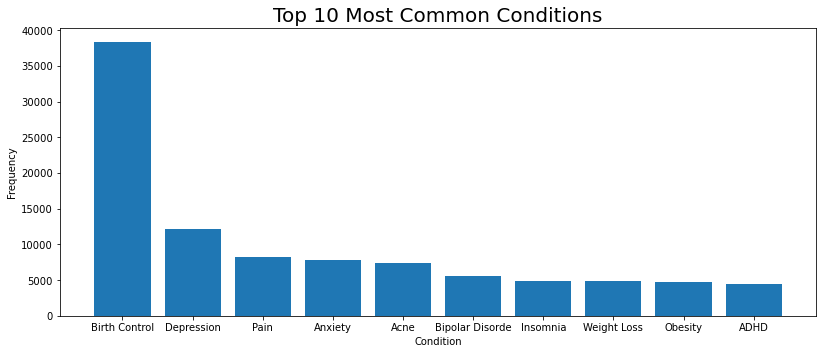

In [19]:
fig = plt.figure() 
ax = fig.add_axes([0,0,1.75,1])

plt.title('Top 10 Most Common Conditions', fontsize=20)
plt.xlabel('Condition')
plt.ylabel('Frequency')

ax.bar(top_cond, cond_freq)
plt.show()

In [39]:
top_condition = pd.DataFrame({'Condition':top_cond, 
             'Frequecy': cond_freq})
top_condition

,Condition,Frequecy
0,Birth Control,38436
1,Depression,12164
2,Pain,8245
3,Anxiety,7812
4,Acne,7435
5,Bipolar Disorde,5604
6,Insomnia,4904
7,Weight Loss,4857
8,Obesity,4757
9,ADHD,4509


# Examining Drugs

In [20]:
unique_drugs = df['drugname'].unique()
unique_drugs.sort()

count_drugs = 0

for drug in unique_drugs:
  count_drugs += 1 

print("Number of Unique Drugs:", count_drugs, "\n")
print("This is The First Few Listed Conditions:",unique_drugs[0:10])

Number of Unique Drugs: 3654 

This is The First Few Listed Conditions: ['A + D Cracked Skin Relief' 'A / B Otic'
 'Abacavir / dolutegravir / lamivudine' 'Abacavir / lamivudine'
 'Abacavir / lamivudine / zidovudine' 'Abatacept' 'Abilify'
 'Abilify Discmelt' 'Abilify Maintena' 'Abiraterone']


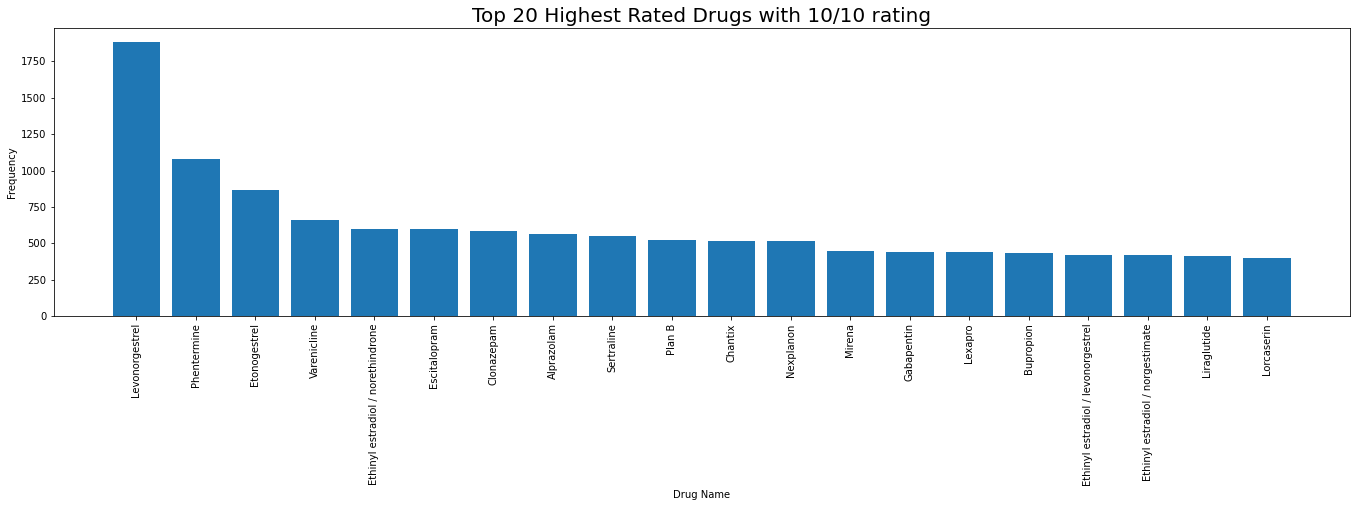

In [45]:
#Top Rated Drugs - find the highest frequency drugs out of 10 
top_rated_drugs = dict(df.loc[df.rating == 10, "drugname"].value_counts())
top_drugname = list(rating.keys())[0:20]
drug_rating = list(rating.values())[0:20]

fig = plt.figure() 
ax = fig.add_axes([0,0,3,1])

plt.title('Top 20 Highest Rated Drugs with 10/10 rating', fontsize=20)
plt.xlabel('Drug Name')
plt.ylabel('Frequency')

ax.bar(top_drugname, drug_rating)
plt.xticks(rotation = 90)
plt.show()

In [44]:
top_drugs = pd.DataFrame({'DrugName':top_drugname, 
             'Frequecy': drug_rating})
top_drugs

,DrugName,Frequecy
0,Levonorgestrel,1883
1,Phentermine,1079
2,Etonogestrel,864
3,Varenicline,662
4,Ethinyl estradiol / norethindrone,601
5,Escitalopram,596
6,Clonazepam,586
7,Alprazolam,565
8,Sertraline,550
9,Plan B,524


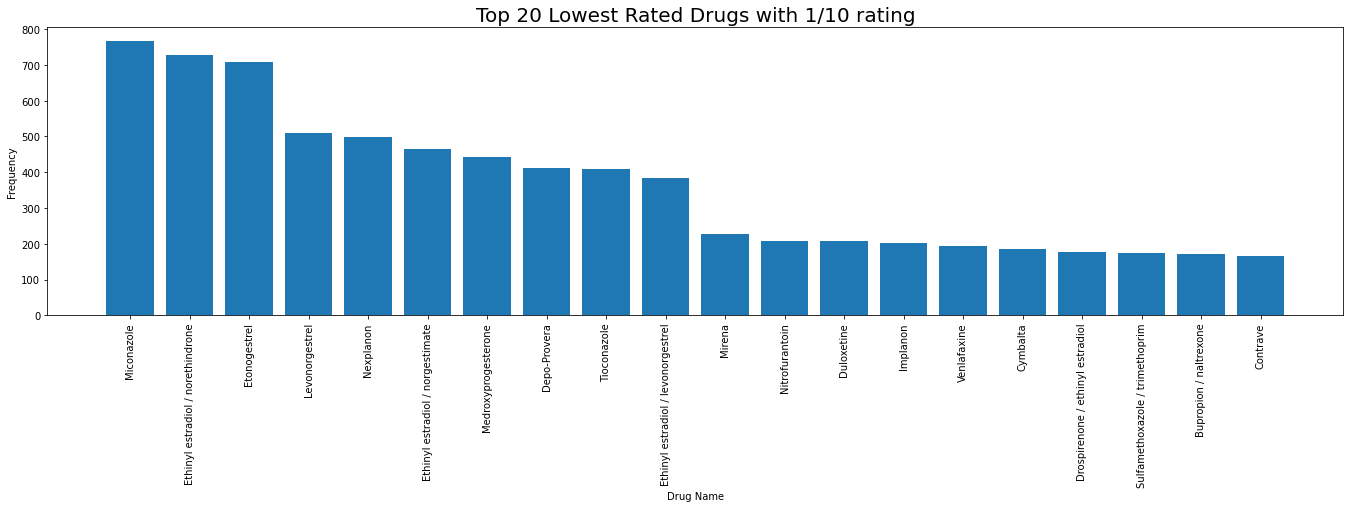

In [47]:
#Top Rated Drugs - find the highest frequency drugs of 1/10 
low_rated_drugs = dict(df.loc[df.rating == 1, "drugname"].value_counts())
low_drugname = list(low_rated_drugs.keys())[0:20]
low_drug_rating = list(low_rated_drugs.values())[0:20]

fig = plt.figure() 
ax = fig.add_axes([0,0,3,1])

plt.title('Top 20 Lowest Rated Drugs with 1/10 rating', fontsize=20)
plt.xlabel('Drug Name')
plt.ylabel('Frequency')

ax.bar(low_drugname, low_drug_rating)
plt.xticks(rotation = 90)
plt.show()

In [48]:
low_drugs = pd.DataFrame({'DrugName':low_drugname, 
             'Frequecy': low_drug_rating})
low_drugs

,DrugName,Frequecy
0,Miconazole,767
1,Ethinyl estradiol / norethindrone,728
2,Etonogestrel,707
3,Levonorgestrel,511
4,Nexplanon,499
5,Ethinyl estradiol / norgestimate,464
6,Medroxyprogesterone,443
7,Depo-Provera,411
8,Tioconazole,410
9,Ethinyl estradiol / levonorgestrel,385


# Examining Ratings

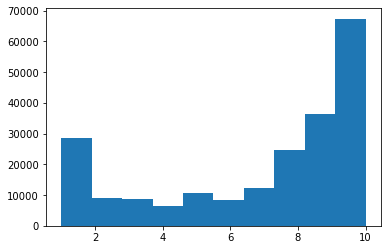

In [49]:
plt.hist(df['rating'], bins = 10)
plt.show()